# 好的，我要开始学习了，咚咚锵。

介绍RL的基本概念。。。。emmmmmmmmm

好了，我要开始敲代码了，哭唧唧

In [68]:
#一些乱七八糟的模块
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [69]:
#设置一些参数
gamma = 1  # 折现率
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

In [70]:
#接下来构建反馈函数
def actionRewardFunction(initialPosition, action):    
    if initialPosition in terminationStates:        
        return initialPosition, 0
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)    
    if -1 in finalPosition or 4 in finalPosition:
        finalPosition = initialPosition
    return finalPosition, rewardSize

In [71]:
#要初始化了，激不激动，刺不刺激！
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
valueMap

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [72]:
#策略评估
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []    
    for state in states:
        weightedRewards = 0        
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap    
    if it in [0,1,2,9, 99, numIterations-1]:        
        print("Iteration {}".format(it+1))        
        print(valueMap)        
        print("")

Iteration 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteration 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

Iteration 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

Iteration 10
[[ 0.         -6.13796997 -8.35235596 -8.96731567]
 [-6.13796997 -7.73739624 -8.42782593 -8.35235596]
 [-8.35235596 -8.42782593 -7.73739624 -6.13796997]
 [-8.96731567 -8.35235596 -6.13796997  0.        ]]

Iteration 100
[[  0.         -13.94260509 -19.91495107 -21.90482522]
 [-13.94260509 -17.92507693 -19.91551999 -19.91495107]
 [-19.91495107 -19.91551999 -17.92507693 -13.94260509]
 [-21.90482522 -19.91495107 -13.94260509   0.        ]]

Iteration 1000
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]



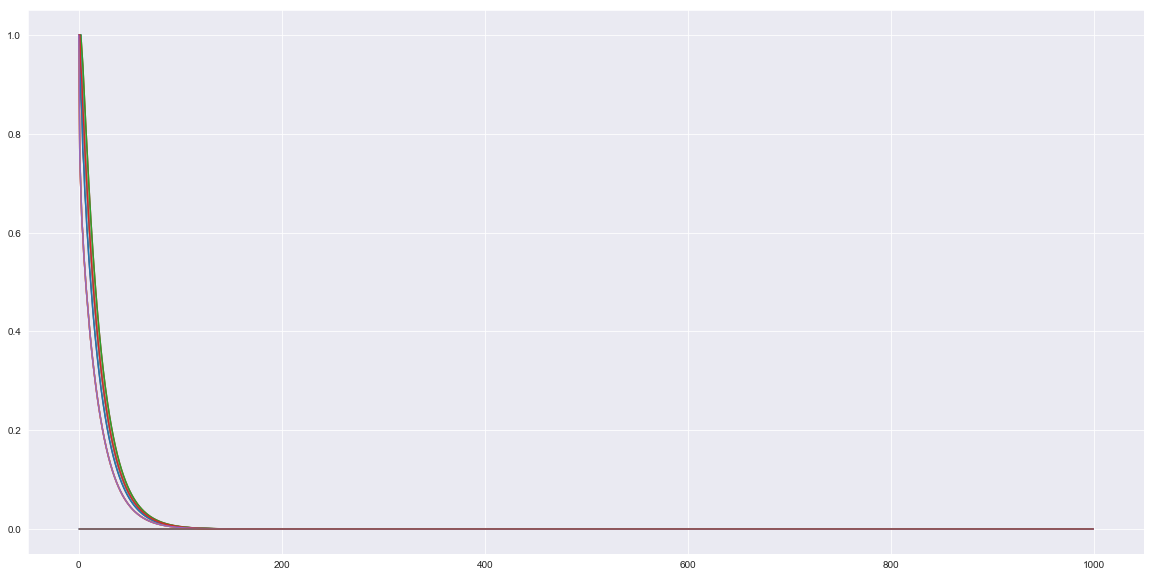

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

开始第二个方法，啦啦啦啦

蒙特卡洛！！！！！！！！

让我们访问蒙特卡洛

In [ ]:
#先来导入一点包！！！！！！
import numpy as np
from tqdm import  tqdm
import seaborn  as sns
import matplotlib.pyplot as plt
import random

  0%|                                                | 0/10000 [00:00<?, ?it/s]

Iteration 1
[[ 0.     -1.96    0.      0.    ]
 [ 0.     -2.176   0.      0.    ]
 [ 0.     -2.3056  0.      0.    ]
 [ 0.      0.      0.      0.    ]]
Iteration 2
[[ 0.       -1.96      0.        0.      ]
 [ 0.       -2.176    -2.38336  -2.430016]
 [ 0.       -2.3056   -2.3056   -2.176   ]
 [ 0.        0.        0.        0.      ]]
Iteration 3
[[ 0.         -2.2090048   0.          0.        ]
 [-1.         -2.33346504 -2.43895902 -2.4649623 ]
 [ 0.         -2.34448    -2.40116741 -2.33792383]
 [ 0.          0.          0.          0.        ]]
Iteration 10
[[ 0.         -2.07953621 -2.4995972  -2.49890766]
 [-1.87311989 -2.43020498 -2.47910761 -2.46449537]
 [-2.39199969 -2.39242644 -2.3608126  -2.43451255]
 [-2.46043617 -2.48898976 -2.19363766  0.        ]]


  1%|▎                                     | 70/10000 [00:00<00:14, 699.51it/s]

Iteration 100
[[ 0.         -1.97232088 -2.37485893 -2.45614779]
 [-2.00932844 -2.35001225 -2.4100733  -2.42458136]
 [-2.40831403 -2.43533154 -2.34817327 -2.03859508]
 [-2.47756665 -2.38474151 -2.04175783  0.        ]]


  9%|███▎                                | 928/10000 [00:00<00:06, 1384.19it/s]

Iteration 1000
[[ 0.         -1.97437247 -2.36794557 -2.45224105]
 [-2.01366273 -2.34500275 -2.40856322 -2.39320337]
 [-2.40739881 -2.42705472 -2.32365873 -1.97609668]
 [-2.45800996 -2.39367149 -1.99132262  0.        ]]


100%|███████████████████████████████████▉| 9981/10000 [00:11<00:00, 513.47it/s]

Iteration 10000
[[ 0.         -2.01556456 -2.39682289 -2.45216938]
 [-2.01247084 -2.33724459 -2.41573692 -2.38951832]
 [-2.39255562 -2.41537585 -2.32599915 -2.00574718]
 [-2.45488079 -2.39421114 -2.00504629  0.        ]]


100%|███████████████████████████████████| 10000/10000 [00:11<00:00, 885.98it/s]


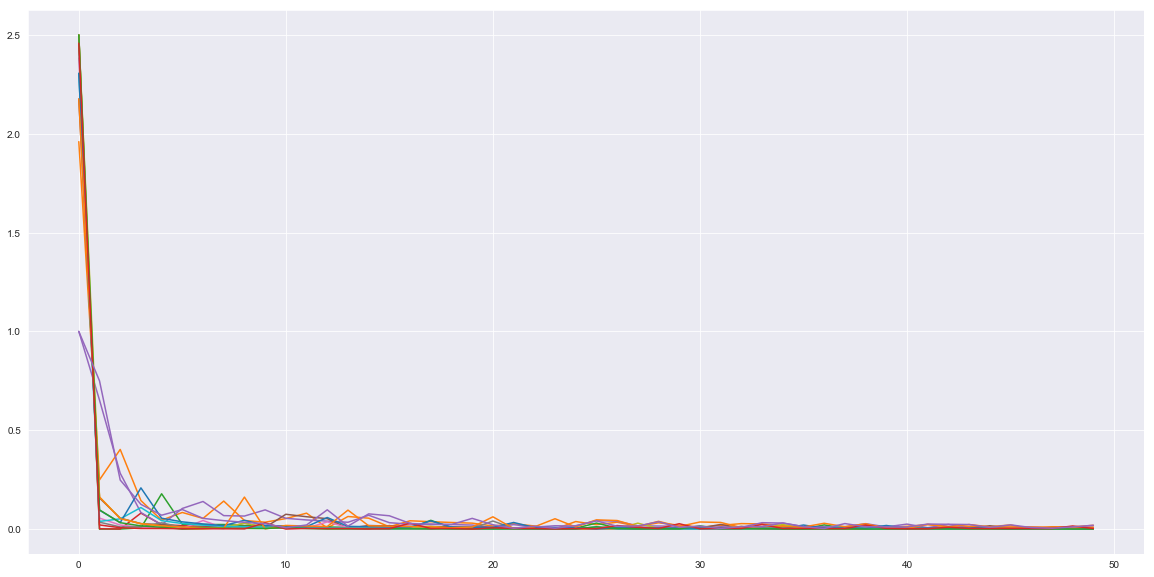

In [139]:
# 参数
gamma = 0.6  # 折现率
rewardSize = -1
gridSize = 4
terminationStates = [[0, 0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000  # 因为是模拟统计近似的方法，所以数据量一定要充足，迭代次数较多

V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i,j] for i in range(gridSize) for j in range(gridSize)]

# 随机产生一条完整序列，并返回这个序列中的每一步的细节
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        if -1 in finalState or gridSize in finalState:
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

# 首次访问蒙特卡洛（每条完整序列跑完才开始迭代和更新值函数）
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = step[2] + gamma * G
        if step[0] not in [x[0] for x in episode[:len(episode) - i - 1]]:
            idx =(step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])  # 求均值并没有破坏列表，列表仍是不断变长的
            deltas[idx].append(np.abs(V[idx[0], idx[1]] - newValue))
            V[idx[0], idx[1]] = newValue
    if it in [0, 1, 2, 9, 99, 999, numIterations-1]:
        print('Iteration %d'%(it+1))
        print(V)
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

开始第三个方法，所谓的时间差异式学习，啊啊啊啊啊

  0%|                                                | 0/10000 [00:00<?, ?it/s]

Iteration 1
[[ 0.         -2.49984766 -2.38336    -2.176     ]
 [-2.4980409  -2.49957683 -2.49929472 -1.96      ]
 [ 0.          0.          0.         -1.6       ]
 [ 0.          0.          0.          0.        ]]
Iteration 2
[[ 0.         -2.49984766 -2.27968    -2.068     ]
 [-2.4980409  -2.49957683 -2.48705024 -1.78      ]
 [-2.49984766 -2.49882454 -2.49455804 -2.015008  ]
 [-2.49999908 -2.49996709 -2.49673483  0.        ]]
Iteration 3
[[ 0.         -2.49984766 -2.27968    -2.068     ]
 [-2.4980409  -2.49957683 -2.42656683 -1.78      ]
 [-2.49984766 -2.48681515 -2.47628382 -1.996672  ]
 [-2.49546458 -2.49726257 -2.46337541  0.        ]]
Iteration 10
[[ 0.         -2.31929619 -2.08384    -2.217904  ]
 [-1.89960811 -2.49985843 -2.34088341 -1.98112   ]
 [-2.27496187 -2.49340693 -2.24571353 -1.7180032 ]
 [-2.44913226 -2.4972708  -2.00535017  0.        ]]
Iteration 100
[[ 0.         -1.96207754 -2.36382265 -2.4398915 ]
 [-2.05556038 -2.39158595 -2.39319588 -2.39585367]
 [-2.41406768 -

  8%|██▊                                 | 792/10000 [00:00<00:05, 1773.85it/s]

Iteration 1000
[[ 0.         -1.99762927 -2.37404711 -2.44487504]
 [-2.01605959 -2.31936712 -2.4003456  -2.38896483]
 [-2.39830389 -2.42513341 -2.33713833 -2.00109756]
 [-2.45517009 -2.39973029 -2.022572    0.        ]]


100%|███████████████████████████████████▉| 9976/10000 [00:10<00:00, 561.50it/s]

Iteration 10000
[[ 0.         -2.01601876 -2.39060329 -2.45188681]
 [-2.01942756 -2.32640854 -2.41344478 -2.38618501]
 [-2.39331712 -2.41465021 -2.3211351  -1.99832075]
 [-2.45089567 -2.39005342 -2.00436444  0.        ]]


100%|███████████████████████████████████| 10000/10000 [00:10<00:00, 922.88it/s]


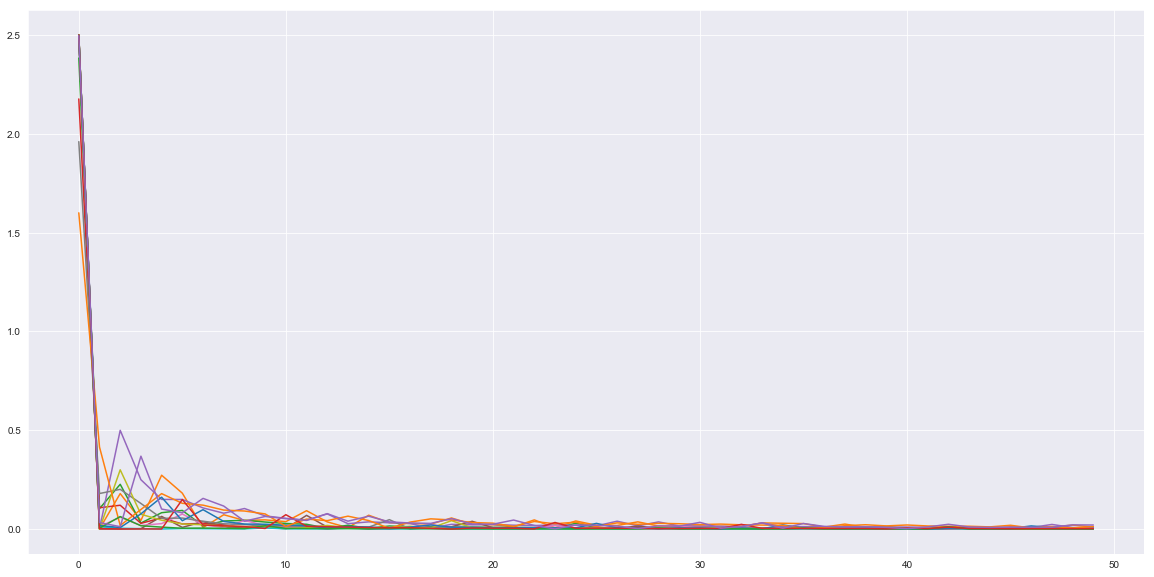

In [140]:
import numpy as np
from tqdm import  tqdm
import seaborn  as sns
import matplotlib.pyplot as plt
import random

# 参数
gamma = 0.6  # 折现率
rewardSize = -1
gridSize = 4
terminationStates = [[0, 0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000  # 因为是模拟统计近似的方法，所以数据量一定要充足，迭代次数较多

V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i,j] for i in range(gridSize) for j in range(gridSize)]

# 随机产生一条完整序列，并返回这个序列中的每一步的细节
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        if -1 in finalState or gridSize in finalState:
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

# 首次访问蒙特卡洛（每条完整序列跑完才开始迭代和更新值函数）
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = step[2] + gamma * G
        if step[0] not in [x[0] for x in episode[:len(episode) - i - 1]]:
        #if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx =(step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])  # 求均值并没有破坏列表，列表仍是不断变长的
            deltas[idx].append(np.abs(V[idx[0], idx[1]] - newValue))
            V[idx[0], idx[1]] = newValue
    if it in [0, 1, 2, 9, 99, 999, numIterations-1]:
        print('Iteration %d'%(it+1))
        print(V)
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)